# The irreducible mass of black holes

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity
from tqdm.notebook import tqdm

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}

In [2]:
def M_irr(m,spin):
    return m*((1+(1-chi**2)**0.5)/2)**0.5

For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

In [3]:
def littlef(x):
    return ((1+(1-chi**2)**0.5)/2)**0.5

In [4]:
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(data[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

In [5]:
N = 1000
sigma = 0.02
chi = np.linspace(0,1, N)
M = np.random.normal(loc=1,scale=sigma,size=N)
Mirr = M_irr(chi,M)


Try an histogram of M_irr and plot the resulting pdf of M_irr. Here, we are going to use the  *Scott's rule*

Text(0, 0.5, 'pdf')

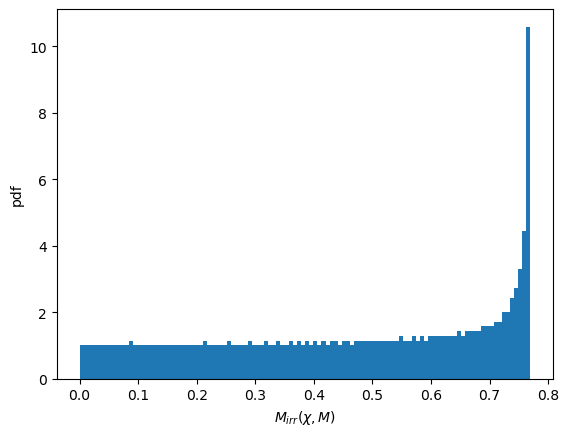

In [6]:
Scott_step = (3.5*sigma)/(N**(1/3))

Scott_bins = np.append(np.arange(start = M_irr(chi,M).min(),stop = M_irr(chi,M).max(), step = Scott_step),M_irr(chi,M).max()) 

plt.hist(M_irr(chi,M), bins = Scott_bins, density = True);
plt.xlabel("$M_{irr}(\chi,M)$")
plt.ylabel("pdf")


The pdf of f is define as:
\begin{equation}
f\_pdf = \pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

Text(0, 0.5, 'pdf')

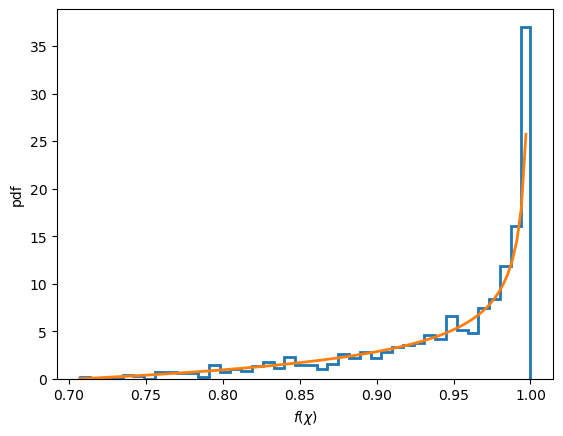

In [7]:
Scott_bins = np.append(np.arange(start = littlef(chi).min(),stop = littlef(chi).max(), step = Scott_step),littlef(chi).max()) 

chi = np.random.uniform(0,1,N)[:-1]
f = littlef(chi)
plt.hist(f,density=True,bins = Scott_bins, histtype='step',lw=2);

f = np.linspace(1/2**0.5,1,100)[:-1]
pdff = 2*(2*f**2-1)/(1 - f**2)**0.5
plt.plot(f,pdff,lw = 2);

plt.xlabel("$f(\chi)$")
plt.ylabel("pdf")


Using the same samples, plot the distribution of M\_irr using a KDE

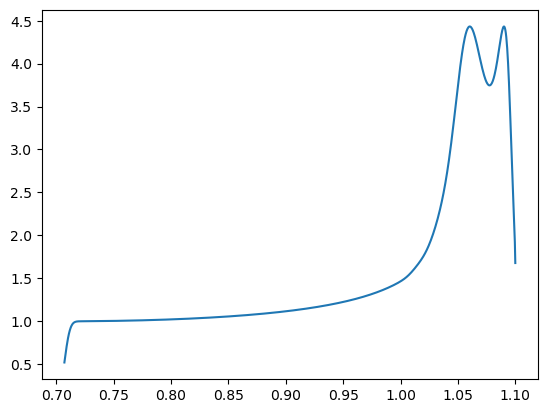

In [8]:
xgrid = np.linspace(littlef(chi).min(),littlef(chi).max(),1000)
x = np.linspace(min(1-5*sigma,1/np.sqrt(2)),1+5*sigma,N)

pdfM_irr = kde_sklearn(Mirr, bandwidth = 0.01, kernel= "gaussian")

plt.plot(x,pdfM_irr)